### 梯度下降的问题

给定学习率，若学习率过大可能会导致求得的解越过目标函数的最优解；若学习率过小则每次迭代移动的速度变慢。



### 动量法

动量法对每次迭代的步骤做如下修改:

$v_t \leftarrow \gamma v_{t-1}+\eta_t g_t$

$x_t \leftarrow x_{t-1}-v_t$

其中$g_t$为之前小批量随机梯度$g_t$的定义

动量超参数$\gamma$ 满足$0 \le \gamma \le 1$.当$\gamma$=0时，动量法等价于小批量随机梯度下降。

#### 指数加权移动平均

数学上的指数加权移动平均定义:给定超参数$0 \le \gamma \le 1$,当前时间步$y_t$有:

$y_t=\gamma y_{t-1}+(1-\gamma)x_t$

对$y_t$展开有:
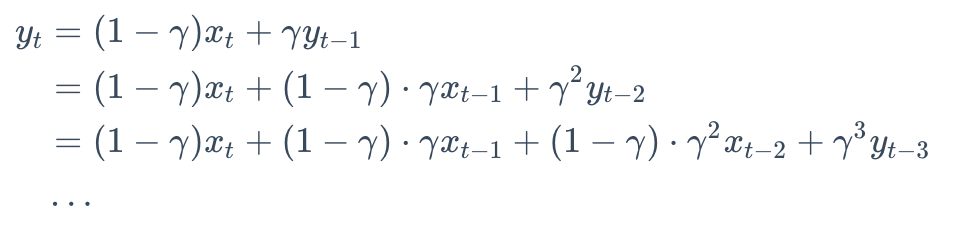

由于当$\gamma \rightarrow 1$时，$\gamma^{\frac{1}{1-\gamma}}=\frac{1}{e}$,由于$\frac{1}{e}$可以当做一个比较小的数，所以我们在近似忽略所有含$\gamma^{\frac{1}{1-\gamma}}$和比$\gamma^{\frac{1}{1-\gamma}}$更高阶的系数的项.例如，当$\gamma=0.95$时，有

$y_t \approx 0.05\Sigma_{i=0}^{19}0.95^{i}x_{t-i}$

在实际中，我们常常将$y_t$看作是对最近$\frac{1}{1-\gamma}$个时间步的$x_t$移动加权平均

#### 由指数加权移动平均理解动量法

对动量法的速度变量做变形:

$v_t \leftarrow \gamma v_{t-1}+(1-\gamma)(\frac{\eta_t}{1-\gamma}g_t)$

**动量法近似于将最近$\frac{1}{1-\gamma}$个时间步的普通更新量（即学习率乘以梯度）做了指数加权移动平均后再除以$1-\gamma$**

所以，在动量法中，自变量在各个方向上的移动幅度不仅取决于当前梯度，还取决于过去的各个梯度在各个方向上是否一致。

**动量法依赖指数加权移动平均使得自变量的更新方向更加一致，从而降低发散的可能。**

### 从零开始实现

In [1]:
import torch
from torch import nn,optim
import utils

In [2]:
features,labels=utils.get_data_ch7()

In [3]:
def init_adagrad_states():
    v_w=torch.zeros((features.shape[1],1),dtype=torch.float32)
    v_b=torch.zeros(1,dtype=torch.float32)
    return (s_w,s_b)
#params为net.parameters()
#states为
#hyperparams:定义超参数的字典
def sgd_momentum(params,states,hyperparams):
    for p,v in zip(params,states):
        v.data=hyperparams['momentum']*v.data+hyperparams['lr']*p.grad.data
        p.data-=v.data

In [ ]:
utils.train_ch7(sgd_mometum,init_momentum_states(),{'lr':0.02,'momentum':0.5},features,labels)

### 简洁实现

在Pytorch中，只需要通过参数momentum来指定动量超参数即可使用动量法。

In [ ]:
utils.train_pytorch_ch7(torch.optim.SGD, {'lr': 0.004, 'momentum': 0.9},
                    features, labels)